<a href="https://colab.research.google.com/github/sungjin-kim-data/ML/blob/master/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

np.random.seed(42)

In [61]:
diabetes = load_diabetes()

In [62]:
diabetes["feature_names"]

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

당뇨병 데이터에서 사용되는 변수명 'feature_names'
 - age : 나이
 - sex : 성별
 - bmi : Body Mass index
 - bp : Average blood pressure
 - s1, s2, s3, s4, s5, s6 : 혈청에 대한 6가지 지표들

In [63]:
data, target = diabetes["data"], diabetes["target"]

In [64]:
data[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

In [65]:
target[0]

151.0

In [66]:
df = pd.DataFrame(data, columns = diabetes["feature_names"])
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [67]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3)

In [70]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(309, 10) (309,)
(133, 10) (133,)


In [71]:
print("train ratio : {:.2f}".format(len(X_train)/len(data)))
print("train ratio : {:.2f}".format(len(X_test)/len(data)))

train ratio : 0.70
train ratio : 0.30


In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
multi = LinearRegression()
multi.fit(X_train, y_train)

LinearRegression()

In [74]:
multi.intercept_

151.00818273080338

In [75]:
multi.coef_

array([  29.25034582, -261.70768053,  546.29737263,  388.40077257,
       -901.95338706,  506.761149  ,  121.14845948,  288.02932495,
        659.27133846,   41.37536901])

In [76]:
multi_train_pred = multi.predict(X_train)
multi_test_pred = multi.predict(X_test)

In [77]:
from sklearn.metrics import mean_squared_error

multi_train_mse = mean_squared_error(multi_train_pred, y_train)
multi_test_mse = mean_squared_error(multi_test_pred, y_test)

In [78]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [79]:
ridge.intercept_

151.8674511024351

In [80]:
ridge.coef_

array([  45.05376742,  -71.94755118,  280.71587522,  195.21369861,
         -2.2294329 ,  -17.54115903, -148.68899417,  120.46709334,
        198.61485885,  106.93453354])

In [81]:
multi.coef_

array([  29.25034582, -261.70768053,  546.29737263,  388.40077257,
       -901.95338706,  506.761149  ,  121.14845948,  288.02932495,
        659.27133846,   41.37536901])

In [82]:
ridge_train_pred = ridge.predict(X_train)
ridge_test_pred = ridge.predict(X_test)

In [83]:
ridge_train_mse = mean_squared_error(ridge_train_pred, y_train)
ridge_test_mse = mean_squared_error(ridge_test_pred, y_test)

In [84]:
print(round(ridge_train_mae, 2))
print(round(ridge_test_mae, 2))

3455.21
3471.39


In [85]:
from sklearn.linear_model import Lasso

In [86]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [87]:
lasso.intercept_

152.16590964050297

In [88]:
ridge.intercept_

151.8674511024351

In [89]:
lasso.coef_

array([  0.        ,  -0.        , 443.70216491,  51.60340063,
         0.        ,   0.        ,  -0.        ,   0.        ,
       201.96712723,   0.        ])

In [90]:
ridge.coef_

array([  45.05376742,  -71.94755118,  280.71587522,  195.21369861,
         -2.2294329 ,  -17.54115903, -148.68899417,  120.46709334,
        198.61485885,  106.93453354])

In [91]:
np.array(diabetes['feature_names'])[lasso.coef_ != 0]

array(['bmi', 'bp', 's5'], dtype='<U3')

In [92]:
lasso_train_pred = lasso.predict(X_train)
lasso_test_pred = lasso.predict(X_test)

In [93]:
lasso_train_mse = mean_squared_error(lasso_train_pred, y_train)
lasso_test_mse = mean_squared_error(lasso_test_pred, y_test)

In [94]:
print(round(lasso_train_mse, 2))
print(round(lasso_test_mse, 2))

3958.28
3444.67


In [95]:
print(round(ridge_train_mse, 2))
print(round(ridge_test_mse, 2))

3514.86
3112.96


In [96]:
print(f"Multi Regression Test MSE is {multi_test_mse}")
print(f"Ridge Regression Test MSE is {ridge_test_mse}")
print(f"Lasso Regression Test MSE is {lasso_test_mse}")

Multi Regression Test MSE is 2821.7385595843784
Ridge Regression Test MSE is 3112.961424786802
Lasso Regression Test MSE is 3444.667115975281


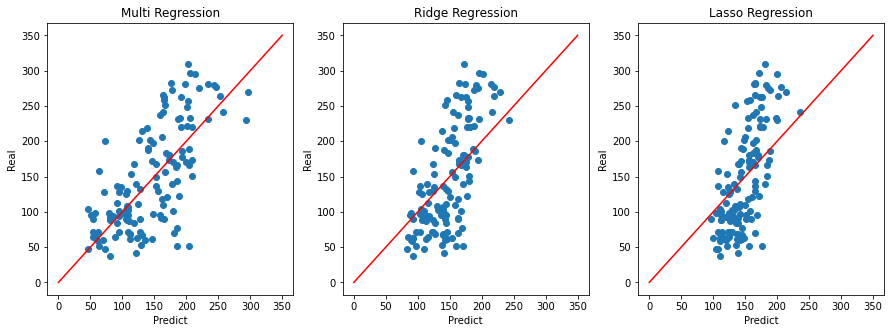

In [97]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(15, 5))
preds = [
    ("Multi Regression", multi_test_pred),
    ("Ridge Regression", ridge_test_pred),
    ("Lasso Regression", lasso_test_pred)
]

for idx, (name, test_pred) in enumerate(preds):
  ax = axes[idx]
  ax.scatter(test_pred, y_test)
  ax.plot(np.linspace(0, 350, 100), np.linspace(0, 350, 100), c='r')
  ax.set_xlabel("Predict")
  ax.set_ylabel("Real")
  ax.set_title(name)